# Decision Tree Regression

Decision Tree Regression is a type of regression model that uses a tree-like structure to make predictions.

### **Concept**

1. **Tree Structure**: The model creates a tree where each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents the predicted value.

2. **Splitting Criteria**: The tree splits the data based on feature values that minimize the variance (or another impurity measure, such as Enthropy) of the target variable within each subset. In regression, this often means minimizing the mean squared error (MSE) in each split.

3. **Prediction**: Once the tree is built, predictions are made by traversing the tree from the root to a leaf based on the feature values of the input data. The value at the leaf node is the predicted value for that input.

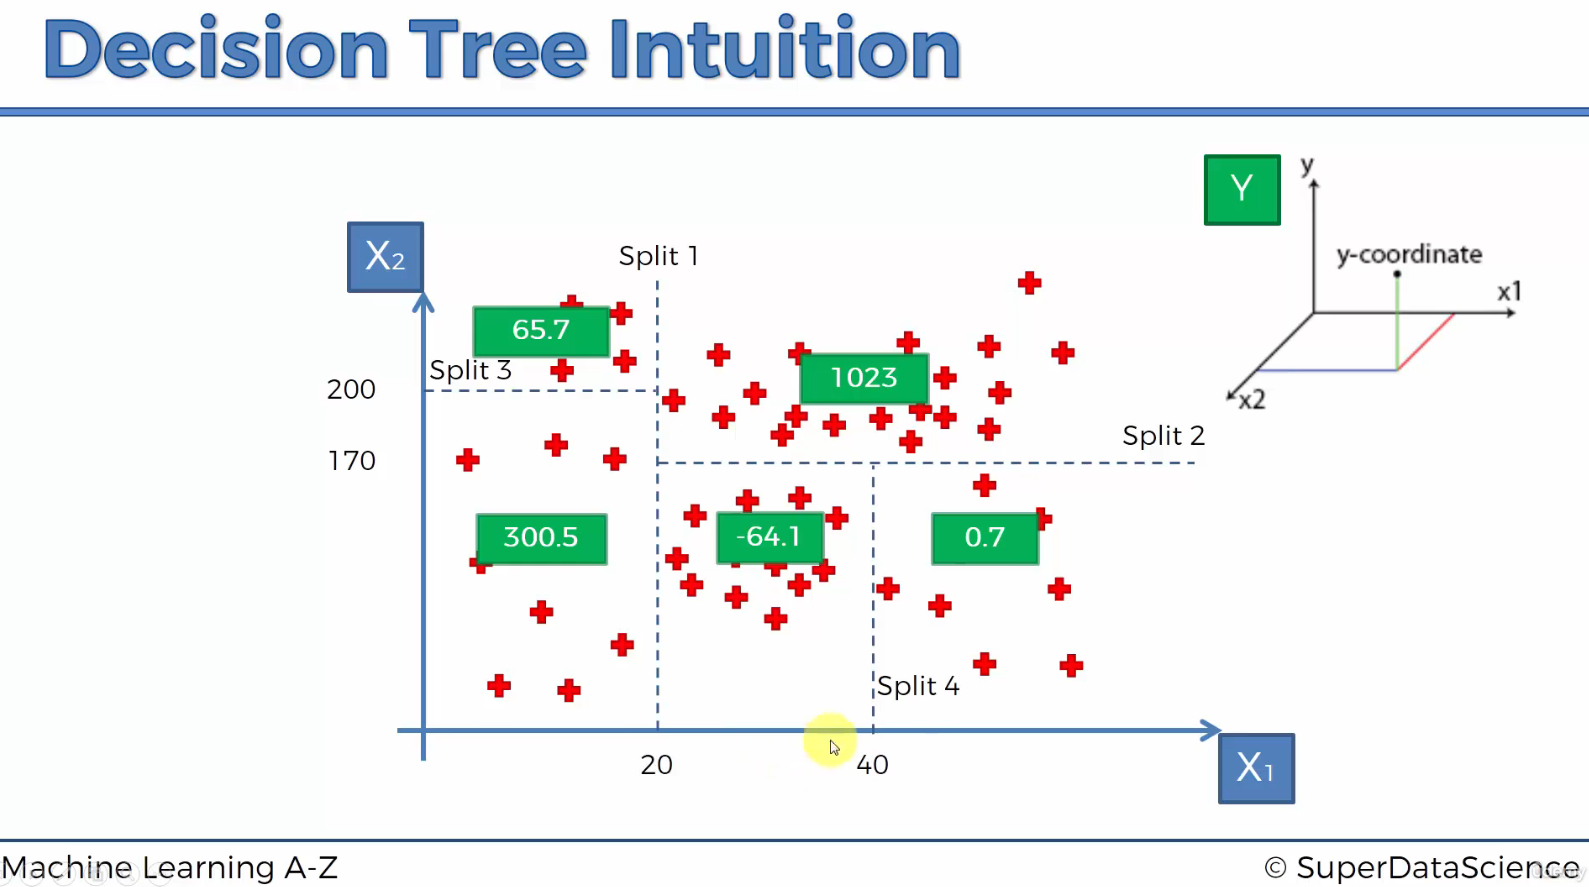

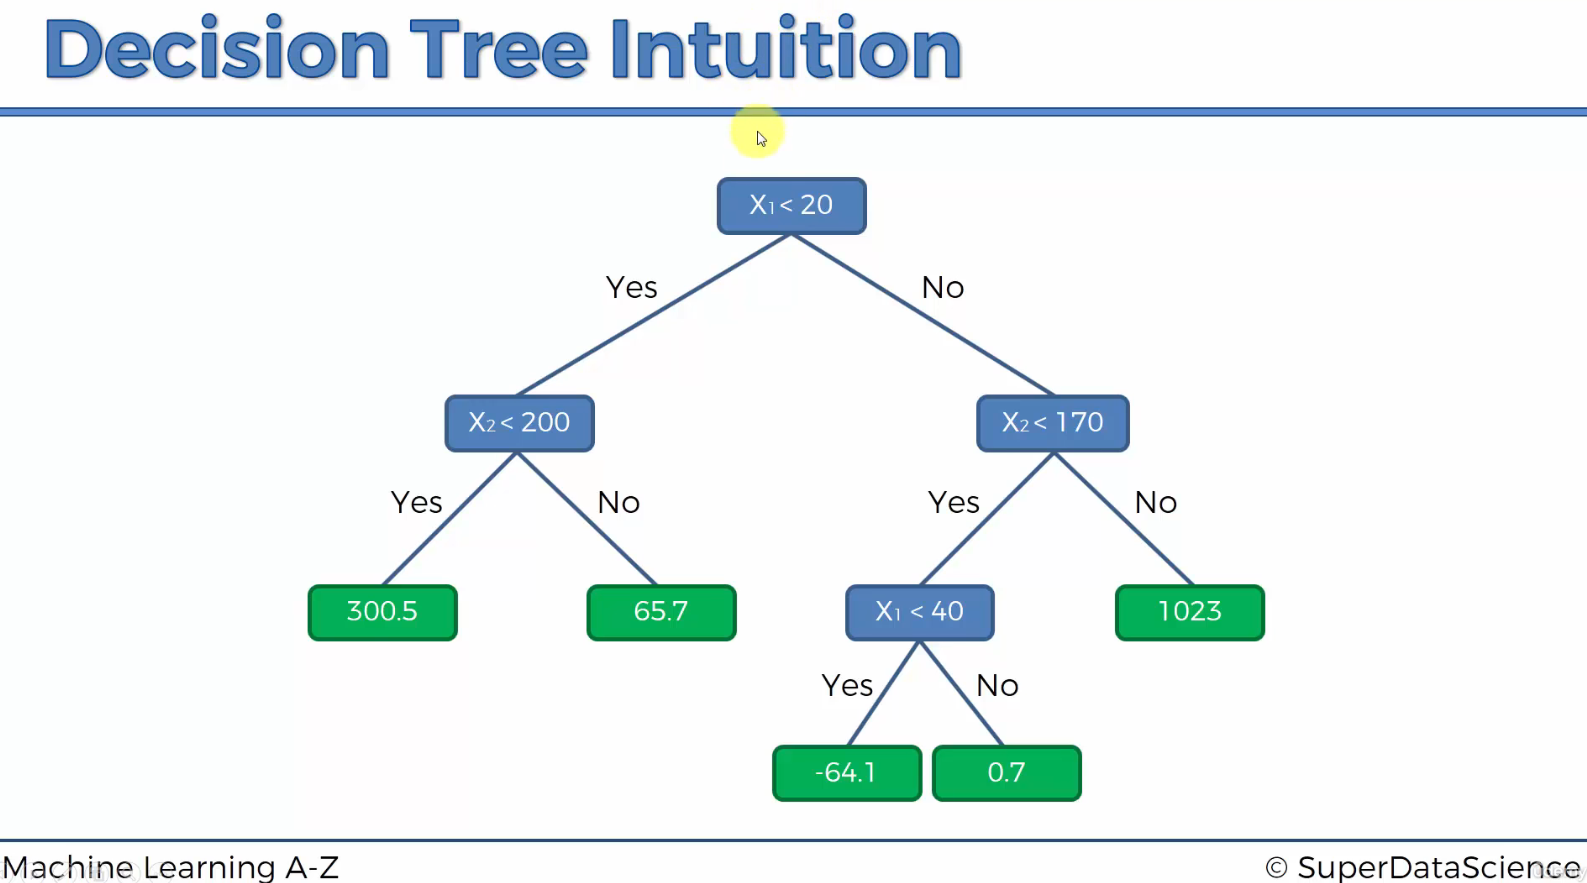

The example uses a scatterplot with two independent variables (x1 and x2) and a dependent variable (y), which isn't immediately visible. The tree-building process involves splitting the scatterplot into segments by determining optimal split points, which increase the "information" or value of the prediction. These splits are based on a mathematical concept called information entropy.

Once the data is split into "leaves" or terminal nodes, the predicted value for any new data point is simply the average of the dependent variable (y) within that leaf. This method improves accuracy compared to using the overall average for the entire dataset.



### **Steps in Building a Decision Tree Regression Model**

1. **Select Feature and Split Point**: At each node, the model selects the feature and split point that best partitions the data according to a certain criterion (like minimizing variance).

2. **Create Subtrees**: The data is divided into subsets based on the selected split, and the process is recursively repeated for each subset.

3. **Stopping Criteria**: The recursion stops when a stopping criterion is met, such as a maximum tree depth, a minimum number of samples in a node, or when further splitting does not significantly improve the model.

### **Advantages**

- **Interpretability**: Decision trees are easy to visualize and interpret.
- **Non-linearity**: They can model complex relationships between features and target variables without needing to transform the data.
- **No Feature Scaling**: They do not require normalization or scaling of features.

### **Disadvantages**

- **Overfitting**: Decision trees can easily overfit the data, especially if they grow too deep and capture noise in the data.
- **Instability**: Small changes in the data can result in a completely different tree structure.

### **Practical Considerations**

- **Pruning**: To avoid overfitting, trees can be pruned, which involves removing parts of the tree that do not provide significant power in predicting target variables.
- **Hyperparameters**: Key parameters include the maximum depth of the tree, the minimum samples required to split a node, and the minimum samples required at a leaf node.


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 2 - Regression/5 Decision Tree Regression/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values # matrix of features
y = dataset.iloc[:, -1].values # dependent variable vector

**Important Notes:**

- This model doesn’t require feature scaling, unlike previous models like SVR.

- The focus of this exercise is on using a familiar dataset (position levels and corresponding salaries) to train the model. However, please not that the decision tree regression is not well-suited for simple datasets with only one feature. However, this implementation will be useful for larger, more complex datasets and serve as reference for datasets with multiple features.

## Training the Decision Tree Regression model on the whole dataset

In [4]:
# Import the DecisionTreeRegressor from sklearn
from sklearn.tree import DecisionTreeRegressor

# Create an instance of DecisionTreeRegressor with a fixed random state for reproducibility
regressor = DecisionTreeRegressor(random_state = 0)

# Fit the model to the dataset (X is the feature matrix, y is the target variable)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

- The class to use is `DecisionTreeRegressor` from the tree module, which predicts continuous values, unlike its counterpart for classification.

- About `DecisionTreeRegressor` parameters:
  - The instructor mentions that there are not many parameters to tune in the `DecisionTreeRegressor` model and doesn't recommend spending too much time on tuning it. He emphasizes that it's typically better to try it among other regression models.
  - However, he introduces the `random_state` parameter to ensure reproducibility, explaining that it fixes the seed to produce the same results each time.
  - Parameter tuning will be covered in a later part of the course.

## Predicting a new result

In [5]:
# Predict the salary for the position level 6.5
regressor.predict([[6.5]])

array([150000.])

## Visualising the Decision Tree Regression results (higher resolution)

<ipython-input-6-710cd8f67b74>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


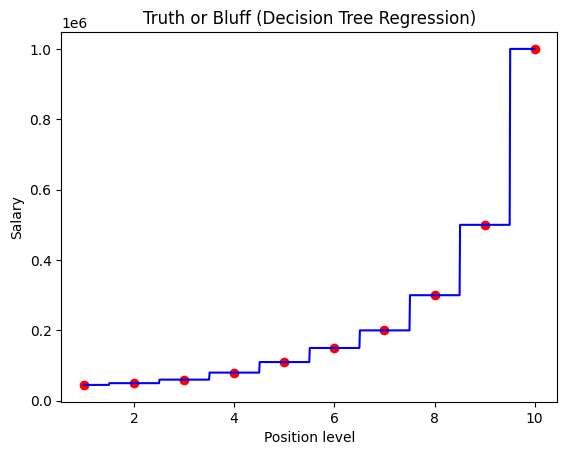

In [6]:
# Create a range of values from the minimum to maximum value of X, with a step of 0.01 for a smoother curve
X_grid = np.arange(min(X), max(X), 0.01)

# Reshape X_grid to a 2D array for prediction compatibility
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')

# Plot the decision tree regression predictions using X_grid for a smoother line
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Above we visualize the Decision Tree Regression results in high resolution.

*Please note that* the resulting graph is not visually appealing. This is because Decision Tree Regression tends to create a **"stair-step"** effect with predictions, as it splits the data into ranges where all values in a range are predicted to be the same.

*Advice*: use this model on higher-dimensional datasets for better performance.